In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from sklearn.linear_model import SGDClassifier

In [ ]:
#load cifar 10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert all images to grayscale to prevent higher train time
x_train = np.array ([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train])
x_test = np.array ([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_test])

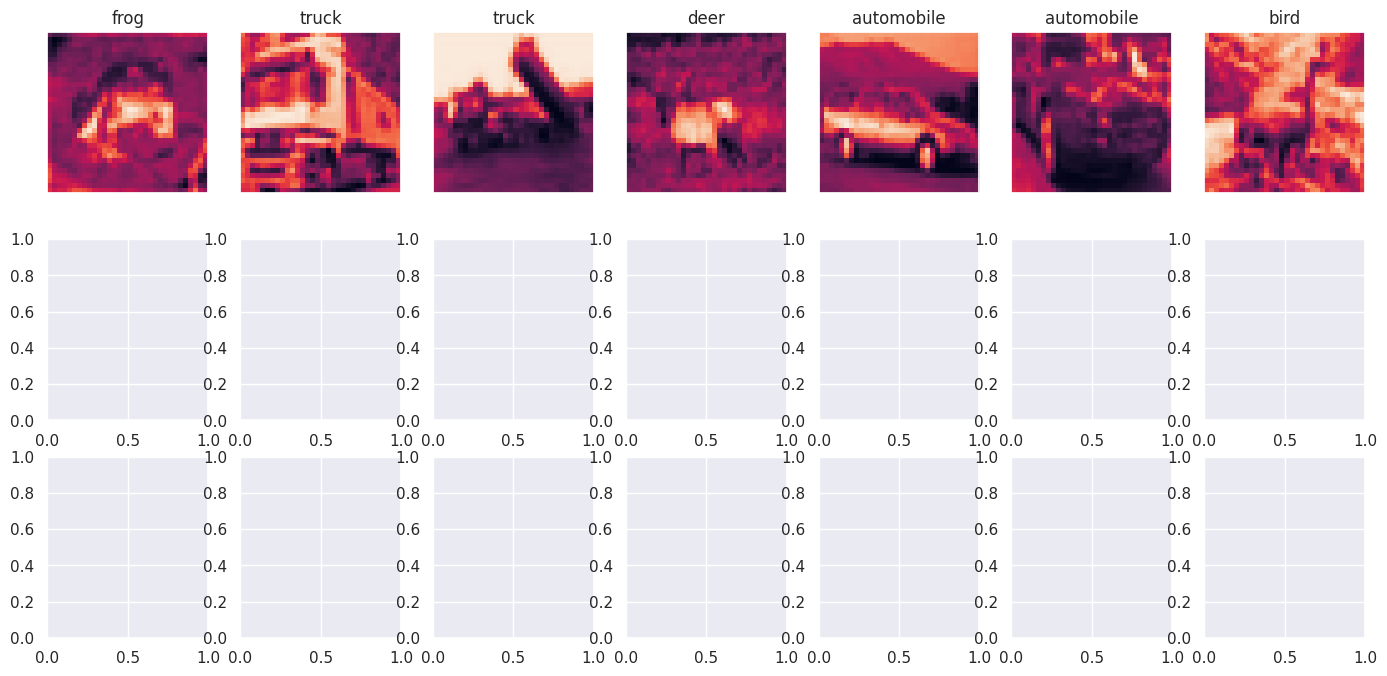

In [ ]:
# plot images from dataset 
labels = ('airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck',)

# check whether all images has converted to grayscale correctly
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17,8))
index = 0
for i in range(3):
  for j in range(7):
    axes[i,j].set_title(labels[y_train[index][0]])
    axes[i,j].imshow(x_train[index])
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index += 1
  plt.show()

In [ ]:
# Data preprocessing
# Normalization
x_train = x_train/255
x_test = x_test/255

In [ ]:
# Labels processing
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit(y_train)

y_train = one_hot_encoder.transform(y_train)
y_test = one_hot_encoder.transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], x_test.shape[2], 1)

input_shape = (x_train.shape[1], x_train.shape[2], 1)

In [ ]:
# model creation
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='relu'))

# optimizer
sgd = SGDClassifier(learning_rate='constant', eta0=0.01, alpha=0.01/25)


# Compile model
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=('accuracy'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 16)        9232      
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        4640      
                                                        

In [ ]:
# Train the model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/10
1563/1563 [==============================] - 352s 224ms/step - loss: 2.2141 - accuracy: 0.1681 - val_loss: 1.9923 - val_accuracy: 0.2483
Epoch 2/10
1563/1563 [==============================] - 382s 244ms/step - loss: 2.1338 - accuracy: 0.2030 - val_loss: 1.9685 - val_accuracy: 0.2612
Epoch 3/10
1563/1563 [==============================] - 370s 237ms/step - loss: 2.1955 - accuracy: 0.1709 - val_loss: 1.9862 - val_accuracy: 0.2646
Epoch 4/10
1563/1563 [==============================] - 286s 183ms/step - loss: 1.9656 - accuracy: 0.2729 - val_loss: 2.0869 - val_accuracy: 0.2421
Epoch 5/10
1563/1563 [==============================] - 272s 174ms/step - loss: 1.8696 - accuracy: 0.3101 - val_loss: 1.7560 - val_accuracy: 0.3653
Epoch 6/10
1563/1563 [==============================] - 262s 168ms/step - loss: 1.8170 - accuracy: 0.3356 - val_loss: 1.6916 - val_accuracy: 0.3760
Epoch 7/10
1563/1563 [==============================] - 262s 168ms/step - loss: 1.8120 - accuracy: 0.3297 - val_

In [ ]:
# save the model
model.save('CIFAR10_MODEL.h5')

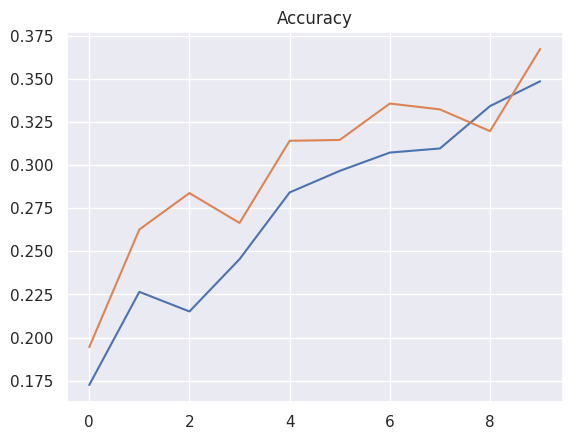

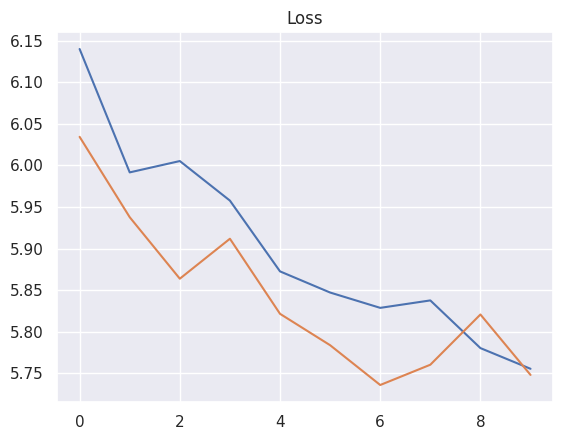

In [ ]:
# load model from file
model = load_model('CIFAR10_MODEL.h5')

# Model evaluation
# Accuracy
plt.title('Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# Loss
plt.title('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

313/313 [==============================] - 1s 2ms/step


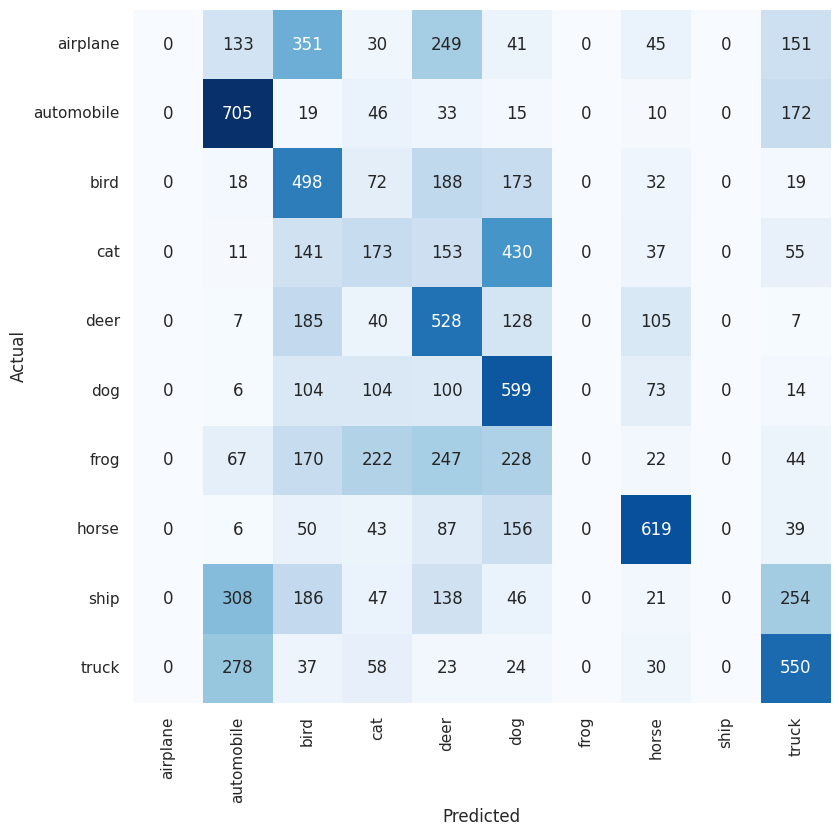

In [ ]:
predictions = model.predict(x_test)
predictions = one_hot_encoder.inverse_transform(predictions)

y_test = one_hot_encoder.inverse_transform(y_test)

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

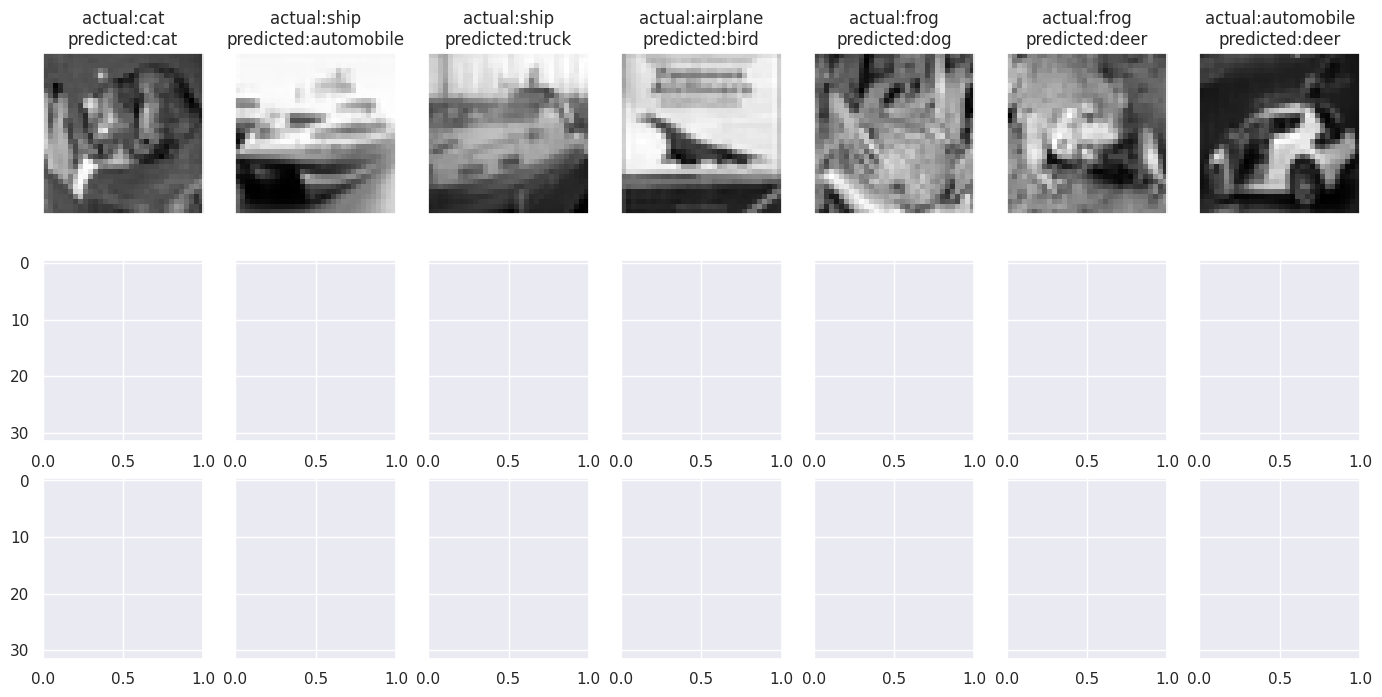

In [ ]:
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2])
y_test = y_test.astype(int)
predictions = predictions.astype(int)

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False, sharey=True, figsize=(17,8))
index = 0 
for i in range(3):
  for j in range(7):
    axes[i,j].set_title('actual:' + labels[y_test[index][0]] + '\n' + 'predicted:' + labels[predictions[index][0]])
    axes[i,j].imshow(x_test[index], cmap='gray')
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index += 1
  plt.show()